# Explore here

In [42]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df.shape

(48895, 16)

In [43]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [45]:
#df.drop(["id","host_name"], axis = 1, inplace = True)


In [46]:
df.host_id.value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

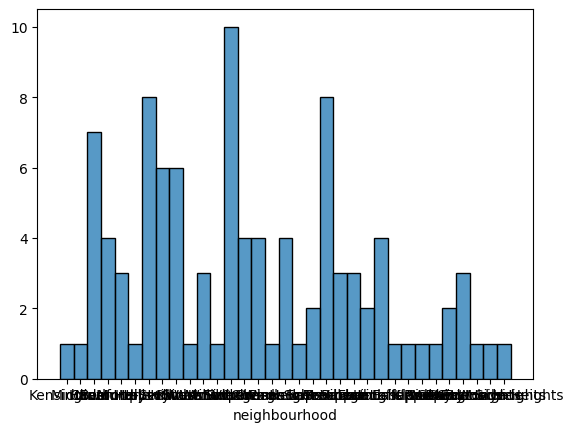

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns



# Crear un histograma múltiple
sns.histplot(data = df[:100], x = "neighbourhood").set(ylabel = None)


# Mostrar el plot
plt.show()

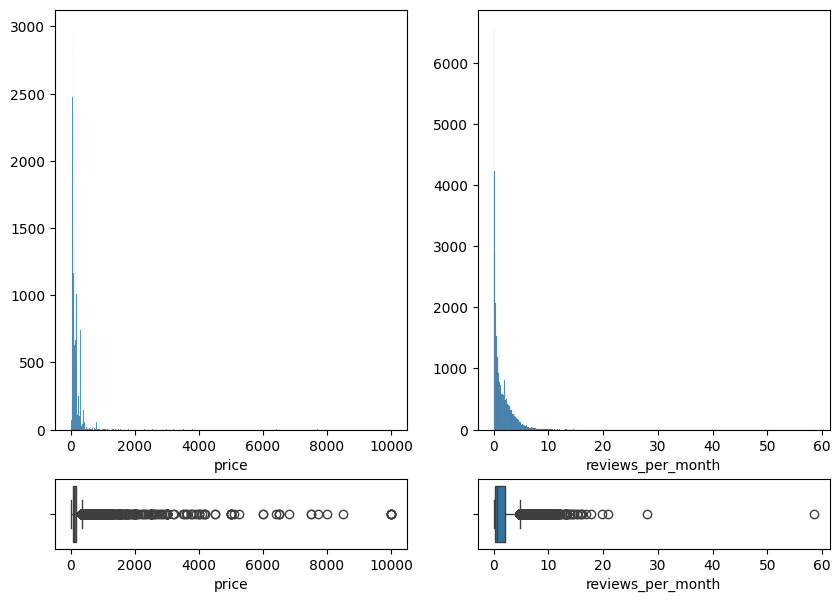

In [48]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7),gridspec_kw={'height_ratios':[6,1]})

# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], data = df, x = "price").set(ylabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "price")
sns.histplot(ax = axis[0,1], data = df, x = "reviews_per_month").set(ylabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "reviews_per_month")
plt.show()

In [49]:
df.neighbourhood.value_counts()  

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

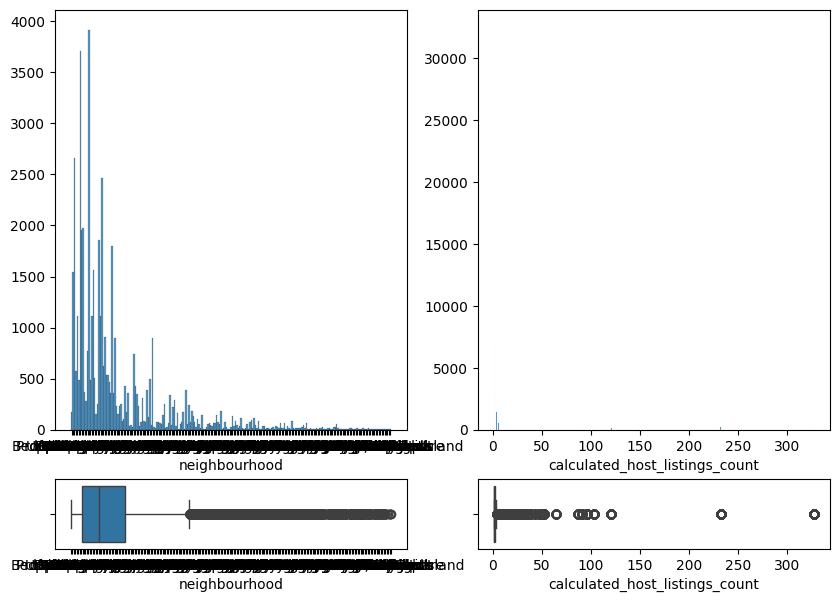

In [50]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7),gridspec_kw={'height_ratios':[6,1]})

# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], data = df, x = "neighbourhood").set(ylabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "neighbourhood")
sns.histplot(ax = axis[0,1], data = df, x = "calculated_host_listings_count").set(ylabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "calculated_host_listings_count")
plt.show()

In [51]:
print('Rows : ',df.shape[0])
print('Columns :', df.shape[1])
print('\nColumns:',df.columns.to_list())
print('Unique:\n',df.nunique())


Rows :  48895
Columns : 16

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Unique:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


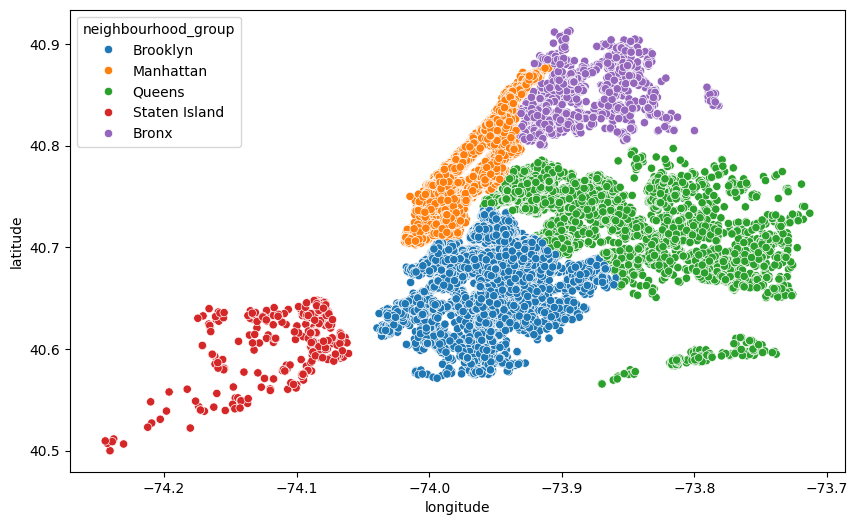

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

In [53]:
print('Los valores unicos del tipo de habitacion son :',df.room_type.unique())
print('Los valores unicos de grupos de vecindarios son :',df.neighbourhood_group.unique())


Los valores unicos del tipo de habitacion son : ['Private room' 'Entire home/apt' 'Shared room']
Los valores unicos de grupos de vecindarios son : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


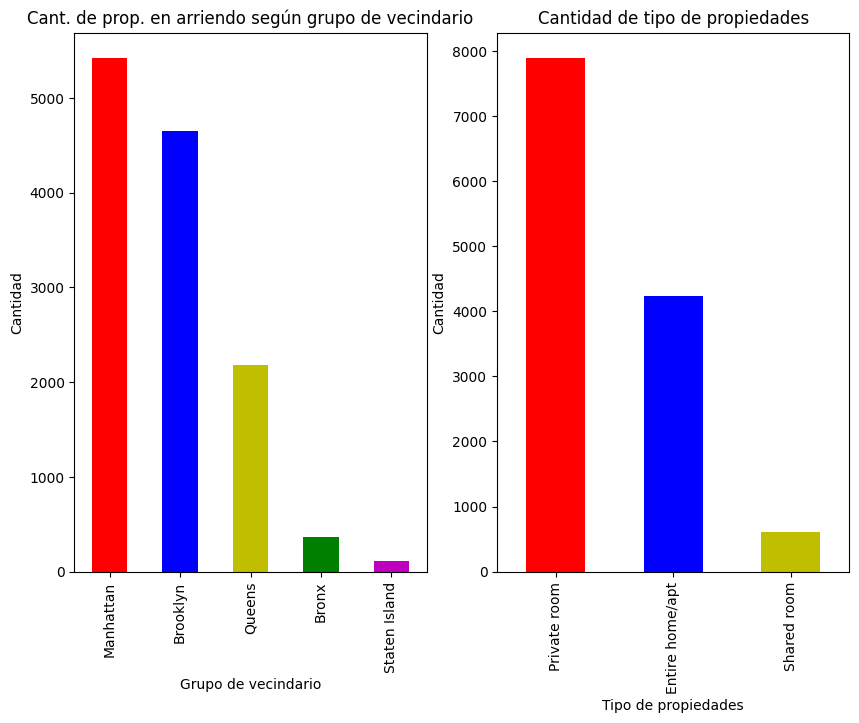

In [63]:
fig, axis = plt.subplots(1, 2, figsize=(10, 7))
df['neighbourhood_group'].value_counts().plot(ax = axis[0], kind='bar',color=['r','b','y','g','m'])
axis[0].set_title('Cant. de prop. en arriendo según grupo de vecindario')
axis[0].set_ylabel('Cantidad')
axis[0].set_xlabel('Grupo de vecindario')

df['room_type'].value_counts().plot(ax = axis[1], kind='bar',color=['r','b','y'])
axis[1].set_title('Cantidad de tipo de propiedades')
axis[1].set_ylabel('Cantidad')
axis[1].set_xlabel('Tipo de propiedades')

# plt.show()
# plt.title('Cantidad de propiedades en arriendo segun grupo de vecindario')
# plt.ylabel('Cantidad')
# plt.xlabel('Grupo de vecindario')
plt.show()

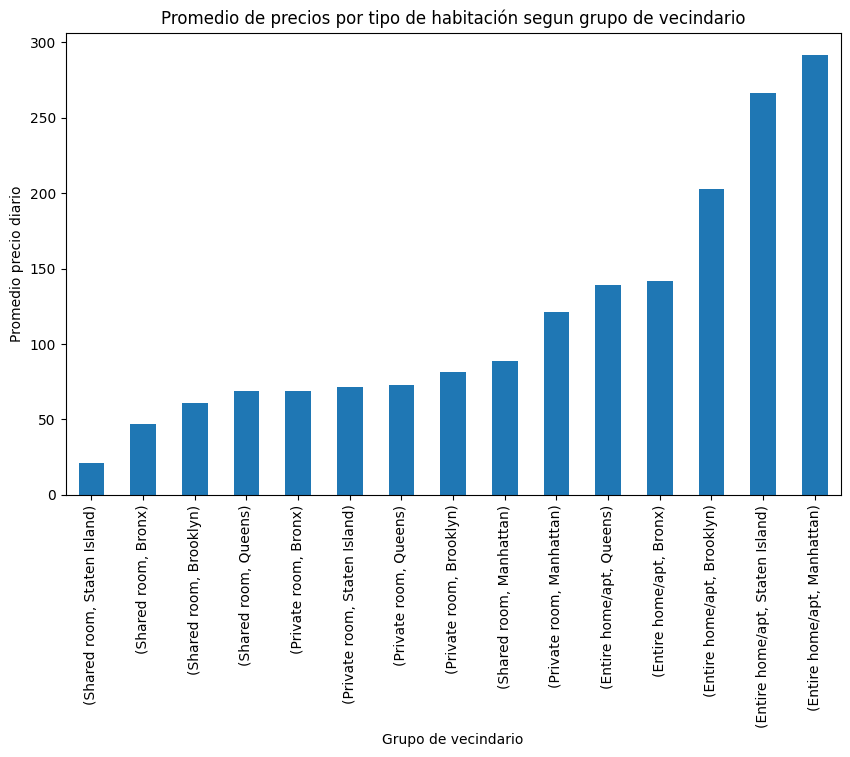

Lista de promedio de precios por noche basado en el grupo de vecindario


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [57]:
df.head()
plt.figure(figsize=(10,6))
df = df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Promedio de precios por tipo de habitación segun grupo de vecindario')
plt.ylabel('Promedio precio diario')
plt.xlabel('Grupo de vecindario')
plt.show()
print('Lista de promedio de precios por noche basado en el grupo de vecindario')
pd.DataFrame(df1).sort_values(by='room_type')